| **Chapter**                   | 4:  Simple compartmental models                       |
| ----------------------------- | ----------------------------------------------------- |
| **Computational Note**        | 4.x: Ross-MacDonald model                             |
| **Package prerequisites**     | None                                                  |

# Ross-MacDonald model

\begin{equation}
\frac{dS_m}{dt} = - a c I_h (1 - I_m)
\end{equation}

\begin{equation}
\frac{dS_h}{dt} = - a b m I_m (1 - I_h)
\end{equation}

\begin{equation}
\frac{dI_m}{dt} = a c I_h (1 - I_m) - \mu_m I_m
\end{equation}

\begin{equation}
\frac{dI_h}{dt} = a b m I_m (1 - I_h) - \gamma I_h
\end{equation}

\begin{equation}
\frac{dR}{dt}   = \gamma I_h
\end{equation}

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

COLORS = {"S": "#2f4b7c",
          "E": "#ffa600",
          "I": "#f95d6a",
          "R": "#a05195",
          "D": "#003f5c",
          "C": "#ff7c43",
          "X": "#665191",
          "Y": "#d45087"}

## Set initial value parameters

In [2]:
I_m_0 = 0.2
I_h_0 = 0.005

a = 0.1
b = 0.2
c = 0.5
m = 10
gamma = 0.05
mu = 0.05

y_0 = (I_m_0, I_h_0)

## Defining the system of ODEs as a function

In [3]:
def deriv(t, y):
    I_m, I_h = y

    dImdt = a * c * I_h * (1 - I_m) - mu * I_m
    dIhdt = a * b * m * I_m * (1 - I_h) - gamma * I_h

    return dImdt, dIhdt

## Solve the IVP

In [4]:
res = solve_ivp(fun=deriv, t_span = (0, 1000), y0=y_0, max_step=1, method="BDF")

## Plot results

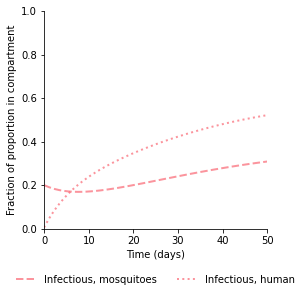

In [5]:
Im, Ih = res.y

fig = plt.figure(facecolor="w", figsize=(4, 4))
ax = fig.add_subplot(111, axisbelow=True)

ax.plot(res.t, Im, color=COLORS["I"], alpha=0.66, lw=2, label="Infectious, mosquitoes", linestyle="dashed")
ax.plot(res.t, Ih, color=COLORS["I"], alpha=0.66, lw=2, label="Infectious, human", linestyle="dotted")

ax.set_xlabel('Time (days)')
ax.set_ylabel("Fraction of proportion in compartment")
ax.set_xlim(0, 50)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)

legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.legend(title='', bbox_to_anchor=(0.5, -0.3), loc="lower center", ncol=2, frameon=False)
ax.set_ylim(0, 1)

plt.savefig("ross_malaria_model.pdf", dpi=600)
plt.show()

## Plot trajectories as a function of $I_m$

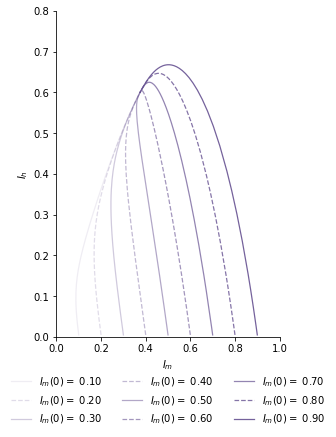

In [6]:
fig = plt.figure(facecolor="w", figsize=(4, 6))
ax = fig.add_subplot(111, axisbelow=True)

subdivs = list(np.arange(0.1, 1, 0.1))

for i, v in enumerate(map(lambda x: solve_ivp(fun=deriv, t_span = (0, 1000), y0=(x, 0.005), max_step=1, method="BDF"), subdivs)):
    ax.plot(v.y[0], v.y[1], color=COLORS["X"], alpha=subdivs[i], lw=1.25, label = f"$I_m(0) =$ {subdivs[i]:.2f}", linestyle="solid" if i % 2 == 0 else "dashed")


ax.set_xlabel('$I_m$')
ax.set_ylabel("$I_h$")
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)

ax.set_xlim(0, 1)
ax.set_ylim(0, 0.8)

legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.legend(title='', bbox_to_anchor=(0.5, -0.3), loc="lower center", ncol=3, frameon=False)

plt.savefig("ross_phase_portrait_convergence.pdf", dpi=600)
plt.show()

## Plot streamplot

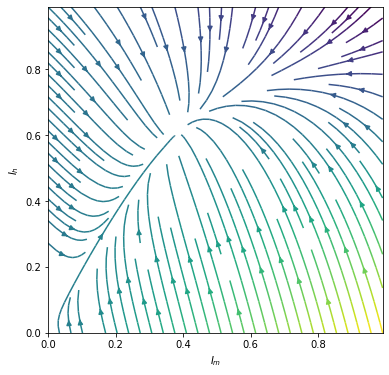

In [8]:
fig = plt.figure(facecolor="w", figsize=(6, 6))
ax = fig.add_subplot(111, axisbelow=True)

i_h, i_m = np.mgrid[0:1:0.01, 0:1:0.01]

u = a * c * i_h * (1 - i_m) - mu * i_m
v = a * b * m * i_m * (1 - i_h) - gamma * i_h
  
ax.streamplot(i_m, i_h, u, v, density = 1, color=u + v)
ax.set_xlabel("$ I_m $") 
ax.set_ylabel("$ I_h $")

plt.savefig("ross_streamplot.pdf", dpi=600)
plt.show()